<a href="https://colab.research.google.com/github/HafshaWahab/YouTube-Sentiment-Analysis/blob/main/youtube_sentiment_full_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/JOBAAJ Projects/Module 5_EDA/6) YouTube Data Analysis/video_id_info.csv", on_bad_lines='skip')

<ipython-input-3-5895a74fa115>:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/JOBAAJ Projects/Module 5_EDA/6) YouTube Data Analysis/video_id_info.csv", on_bad_lines='skip')


In [4]:
df.shape

(691400, 4)

In [5]:
df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [6]:
df.tail()

,video_id,comment_text,likes,replies
691395,EoejGgUNmVU,Лучшая,1,0
691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0
691397,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0
691398,EoejGgUNmVU,Islığı yeter...,0,0
691399,EoejGgUNmVU,Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...,0,0


In [7]:
df.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [8]:
#drop null values
df.dropna(inplace=True)

In [9]:
df.shape

(691374, 4)

In [10]:
df.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

## 2)Performing Sentiment Analysis

In [11]:
#TextBlob is a Python library for processing textual data. It provides a simple API for common natural language processing (NLP) tasks.

!pip install textblob

import sys     #It's called "sys" because it provides access to system-specific parameters and functions.
!{sys.executable} -m pip install textblob

In [12]:
from textblob import TextBlob

In [13]:
# taking sample data size of 1000 data records only.
# creating a new DataFrame (sample_df) by selecting the first 1000 rows of an existing DataFrame (df).

sample_df = df[0:5000]

In [14]:
sample_df

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
...,...,...,...,...
4996,eM_FR7I2Ttw,I'd love to hear Harry write like...an entire ...,1,0
4997,eM_FR7I2Ttw,This's so beautiful,2,0
4998,eM_FR7I2Ttw,nothing but respect for MY president,0,0
4999,eM_FR7I2Ttw,*To everyone who is new here: he actually perf...,2,0


In [15]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️")      #gives a normal text.

TextBlob("Logan Paul it's yo big day ‼️‼️‼️")

In [16]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment    #checking the sentiment

Sentiment(polarity=0.0, subjectivity=0.1)

In [17]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity     #checking polarity of the sentiment. So, in the output we got a neutral sentence.
                                                                  # -1: Negative, 0: Neutral, 1:Positive

0.0

In [18]:
#running a for-loop to check the sentiments of all the data records in comment_text column.
polarity =[]    #creating a blank list to store all the sentiment values that we will get from running the loop.
for comment in df['comment_text']:
  try:
    polarity.append(TextBlob(comment).sentiment.polarity)
  except:
      polarity.append(0)

In [19]:
len(polarity)

691374

In [20]:
df['polarity'] = polarity

In [21]:
df.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


## 3)Wordcloud Analysis of Data

In [22]:
filter1 = df['polarity']==1
comments_positive = sample_df[filter1]
df[filter1]

<ipython-input-22-7449f4ba695a>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  comments_positive = sample_df[filter1]


,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0
...,...,...,...,...,...
691373,EoejGgUNmVU,Perfect. Every version,0,0,1.0
691383,EoejGgUNmVU,Me encantaaaaa <3,0,0,1.0
691388,EoejGgUNmVU,Best song ever 🤘,0,0,1.0
691389,EoejGgUNmVU,excellent performance,0,0,1.0


In [23]:
filter2 = df['polarity']==-1
comments_negative = df[filter2]
df[filter2]

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0
...,...,...,...,...,...
690788,Hlt3rA-oDao,Like Kelly she evil,0,0,-1.0
690865,Ni5Uc-DdMqk,R U FUCKING KIDDING ME?!?!?!?!,11,1,-1.0
691073,4kmSATD25iY,This is horribly offensive please report,0,0,-1.0
691180,xlu6i6lT_vk,Sink holes looks terrifying sinkholes sink you...,0,0,-1.0


In [24]:
!pip install wordcloud
import sys
!{sys.executable} -m pip install wordcloud

In [25]:
from wordcloud import WordCloud, STOPWORDS
#Stopwords are common words like "the," "is," and "and" that are often removed from text during analysis because they don't carry significant meaning.

In [26]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [27]:
df['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691374, dtype: object

In [28]:
type(df['comment_text'])

pandas.core.series.Series

In [29]:
### for wordcloud , we need to frame our 'comment_text' feature into string ..
# joins all the text data from the 'comment_text' column in the DataFrame 'comments_positive' into a single string, separated by spaces.
total_comments_positive = ' '.join(comments_positive['comment_text'])

In [30]:
total_comments_positive

"yu are the best Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. YAS Can't wait to get it! I just need to sell my kidney so I can afford iPhone X :D This is priceless Summed up perfectly This is awesome. 1:20 XDDDDDDDDD BEST MOVIE EVER!!! Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. The greatest movie about the greatest movie. It's Harry guys he's Spiderman best friend Best remake ever! Great review! awesome vlog Subscribe to me if Roman Atwood is the best youtuber I was attacked by a police dog once, \\n\\n\\n\\n\\n\\nthat was the best use of peanut butter ever. The best part of the movie was the credits DO THE ORIGINAL STEPHEN KING'S IT!!!!!!!!!!!!!! 🤣🤣🤣🤣😃😃😃😃 i downloaded and saw The Mummy 2017  in the best quality guys. here's the Iink https://twitter.com/akewdiudri/status/907980087676477442\\nyou must see too guys! that was awesome. 

In [31]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)

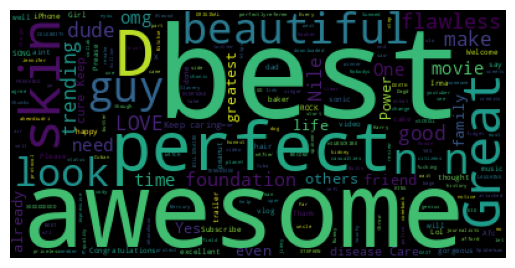

In [32]:
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

***Hence, some of the positive words are: awesome, best, love, great, perfect, beautiful, video, etc.***

In [33]:
total_comments_negative = ' '.join(comments_negative['comment_text'])
total_comments_negative

"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!! Well… The brain surgeon Ben Carson just proved how truly insane he is… WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!! WTF BRUH!!!!!! cheeseus christ thats insane!!! this is the worst thing i've heard. ever. Economy is horrible in Cuba. It's going to be years before they get out of this. Sub to me if this is terrible PATHETIC I don't like this sportscaster  sounds very annoying commentators are awful This tv show became trump witch hunt tube... and frankly, boring. Arpaio should be arrested again for horribly butchering that song. This  show has become one-noted and pathetic. HARD CANDY!!!!!!!!!!! Tired of the philosophy add !!!!!!! boring 0:22   **laughs at terrible pun** Why is media even covering this disgusting woman anymore? How is this trending ? Awful a horrible attempt to try and get us to freak out this is one of the worst videos I've ever seen Whats with the horrible music? tf She 

In [34]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_negative)

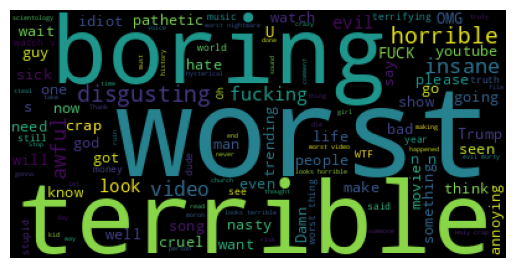

In [35]:
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

***Hence, some of the negative words are boring, worst, terrible, horrible, pathetic, cruel, insane, etc.***

## 4) Performing Emoji Analysis

In [36]:
!pip install emoji==2.10.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 6.0 MB/s eta 0:00:00


In [37]:
import sys
!{sys.executable} -m pip install emoji==2.10.1

In [38]:
import emoji

In [39]:
emoji.__version__

'2.10.1'

In [40]:
comment = 'trending 😉'

In [41]:
#extracting emoji from the sentence
[char for char in comment if char in emoji.EMOJI_DATA]

['😉']

In [42]:
emo_list = []

for char in comment:
    if char in emoji.EMOJI_DATA:
        emo_list.append(char)

emo_list

['😉']

In [43]:
#iterating loop to extract all the emojis
all_emoji_list=[]
for comment in df['comment_text'].dropna():
  for char in comment:
    if char in emoji.EMOJI_DATA:
      all_emoji_list.append(char)

#Displaying only first 10 emojis. We can also display more emojis by not defining the size.
all_emoji_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

**Now we will check the frequency of each and every emoji.**

In [44]:
from collections import Counter

In [45]:
Counter(all_emoji_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [46]:
# checking frequency of the first emoji only
Counter(all_emoji_list).most_common(10)[0]

('😂', 36987)

In [47]:
Counter(all_emoji_list).most_common(10)[0][0]

'😂'

In [48]:
Counter(all_emoji_list).most_common(10)[0][1]

36987

In [49]:
# checking frequency of the second emoji only
Counter(all_emoji_list).most_common(10)[1]

('😍', 33453)

In [50]:
#displaying only the emoji list containing all the emojis
emojis = [Counter(all_emoji_list).most_common(20)[i][0] for i in range(20)]
emojis

['😂',
 '😍',
 '❤',
 '🔥',
 '😭',
 '👏',
 '😘',
 '👍',
 '💖',
 '💕',
 '♥',
 '😊',
 '🏻',
 '💜',
 '😬',
 '👌',
 '💙',
 '😢',
 '🏼',
 '🤣']

In [51]:
freqs = [Counter(all_emoji_list).most_common(20)[i][1] for i in range(20)]
freqs

[36987,
 33453,
 31119,
 8694,
 8398,
 5719,
 5545,
 5476,
 5359,
 5147,
 4909,
 3596,
 3438,
 3429,
 3381,
 3112,
 2831,
 2672,
 2549,
 2279]

In [52]:
import plotly.io as pio
# Set the renderer for Google Colab
pio.renderers.default = 'colab'

In [53]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [56]:
# Generate a list of colors (you can customize this list with more colors if needed)
colors = [
    '#FF6347', '#6A5ACD', '#20B2AA', '#FF69B4', '#87CEFA',
    '#32CD32', '#FFA07A', '#778899', '#B0C4DE', '#FFFF54',
    '#40E0D0', '#EE82EE', '#FF6347', '#6A5ACD', '#20B2AA',
    '#FF69B4', '#87CEFA', '#32CD32', '#FFA07A', '#778899'
]
trace = go.Bar(x=emojis, y=freqs, text=freqs,textposition='auto', marker=dict(color=colors))

# Create the figure
fig = go.Figure(data=[trace])

# Update layout with axis labels and x-tick label size
fig.update_layout(
    title='Emoji Frequency',
    xaxis_title='Emojis',
    yaxis_title='Frequency',
    xaxis=dict(
        tickfont=dict(size=20),
        showgrid=False
    ),
    yaxis=dict(
        showgrid=False
)
)

# Show the figure
fig.show()

***Hence, maximum users are happy with the particular YouTube content.***

## Analysing entire data on YouTube

In [57]:
import os

In [58]:
files = os.listdir('/content/drive/MyDrive/JOBAAJ Projects/Module 5_EDA/6) YouTube Data Analysis/YT_additional_data')
files

['MX_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'JP_category_id.json',
 'IN_category_id.json',
 'US_category_id.json',
 'DE_category_id.json',
 'RU_category_id.json',
 'KR_category_id.json',
 'CAvideos.csv',
 'FR_category_id.json',
 'JPvideos.csv',
 'FRvideos.csv',
 'CA_category_id.json',
 'KRvideos.csv',
 'README.md',
 'USvideos.csv',
 'RUvideos.csv',
 'DEvideos.csv',
 'INvideos.csv',
 'MXvideos.csv']

In [59]:
files_csv = [file for file in files if '.csv' in file]
files_csv

['GBvideos.csv',
 'CAvideos.csv',
 'JPvideos.csv',
 'FRvideos.csv',
 'KRvideos.csv',
 'USvideos.csv',
 'RUvideos.csv',
 'DEvideos.csv',
 'INvideos.csv',
 'MXvideos.csv']

In [60]:
#while colllecting the data if you encounter any kind of warning its always a good practice to import  warning modules.

import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [61]:
#storing all the csv files in one dataframe

full_df = pd.DataFrame()
path = '/content/drive/MyDrive/JOBAAJ Projects/Module 5_EDA/6) YouTube Data Analysis/YT_additional_data'

for file in files_csv:
    current_df = pd.read_csv(path+'/'+file, encoding='iso-8859-1')
    full_df = pd.concat([full_df, current_df], ignore_index=True)

In [62]:
full_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: â¦Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs â¦Ready f...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375937,r63VBOagGAo,18.14.06,Shawn Mendes x Portugal (FPF Official World Cu...,FPFutebolOficial,17,2018-06-13T13:11:56.000Z,"Canal|""Oficial""|""da""|""FederaÃ§Ã£o""|""Portuguesa...",653114,65639,547,3826,https://i.ytimg.com/vi/r63VBOagGAo/default.jpg,False,False,False,Portugal's Football Team Official SongLyrics: ...
375938,i7r_kMbyngk,18.14.06,AMLO llegÃ³ con su esposa al Tercer Debate en ...,AMX,25,2018-06-13T01:15:08.000Z,"AMLO|""morena""|""polÃ­tica""|""PRI""|""PAN""|""PRD""|""L...",121674,3558,58,491,https://i.ytimg.com/vi/i7r_kMbyngk/default.jpg,False,False,False,AMLO llegÃ³ con su esposa al Tercer Debate en ...
375939,_jnwjdMe3Zo,18.14.06,Maire usa una blusa kawaiii Â¿adorable o ridÃ­...,Historias Wink,24,2018-06-13T15:08:53.000Z,"maire|""maire vs el internet""|""maire vs interne...",14067,538,6,90,https://i.ytimg.com/vi/_jnwjdMe3Zo/default.jpg,False,False,False,Maire usa una blusa kawaii de Alicia en el paÃ...
375940,pAH9omNAWA4,18.14.06,La Jefa del CampeÃ³n - CapÃ­tulo 2 Parte 3/4,Tele Time,22,2018-06-13T02:22:33.000Z,[none],22898,94,11,3,https://i.ytimg.com/vi/pAH9omNAWA4/default.jpg,False,False,False,NaN


In [63]:
full_df.shape

(375942, 16)

In [64]:
# Checking for duplicate records of data
full_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
375937    False
375938    False
375939    False
375940    False
375941    False
Length: 375942, dtype: bool

In [65]:
full_df[full_df.duplicated()].shape

(36417, 16)

***So, we have 36417 records of duplicated data.***

In [66]:
#dropping the duplicate values
full_df = full_df.drop_duplicates()

In [67]:
full_df.shape

(339525, 16)

### Which category has the maximum likes?

In [68]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: â¦Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs â¦Ready f...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...


In [69]:
full_df.isnull().sum()

video_id                      0
trending_date                 0
title                         0
channel_title                 0
category_id                   0
publish_time                  0
tags                          0
views                         0
likes                         0
dislikes                      0
comment_count                 0
thumbnail_link                0
comments_disabled             0
ratings_disabled              0
video_error_or_removed        0
description               17977
dtype: int64

In [70]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

### Which content category has the maximum likes?

In [71]:
full_df['category_id'].unique()

array([26, 24, 10, 17, 25, 22, 23, 28, 15, 27,  1, 20,  2, 19, 29, 43, 30,
       44])

In [72]:
# Let's read any json file from the folder

json_df = pd.read_json('/content/drive/MyDrive/JOBAAJ Projects/Module 5_EDA/6) YouTube Data Analysis/YT_additional_data/US_category_id.json')
json_df

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [73]:
json_df['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [74]:
#Extract channel ID and title in a dictionary
cat_dict = {}
for item in json_df['items'].values:
    cat_dict[int(item['id'])] = item['snippet']['title']

In [75]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [76]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: â¦Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs â¦Ready f...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...


In [77]:
# create new column of category name
full_df['category_name'] = full_df['category_id'].map(cat_dict)
full_df['category_name']

0           Howto & Style
1           Entertainment
2                   Music
3                  Sports
4         News & Politics
               ...       
375937             Sports
375938    News & Politics
375939      Entertainment
375940     People & Blogs
375941      Entertainment
Name: category_name, Length: 339525, dtype: object

In [78]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,Howto & Style
1,3s1rvMFUweQ,17.14.11,Taylor Swift: â¦Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs â¦Ready f...,Entertainment
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,Sports
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,News & Politics


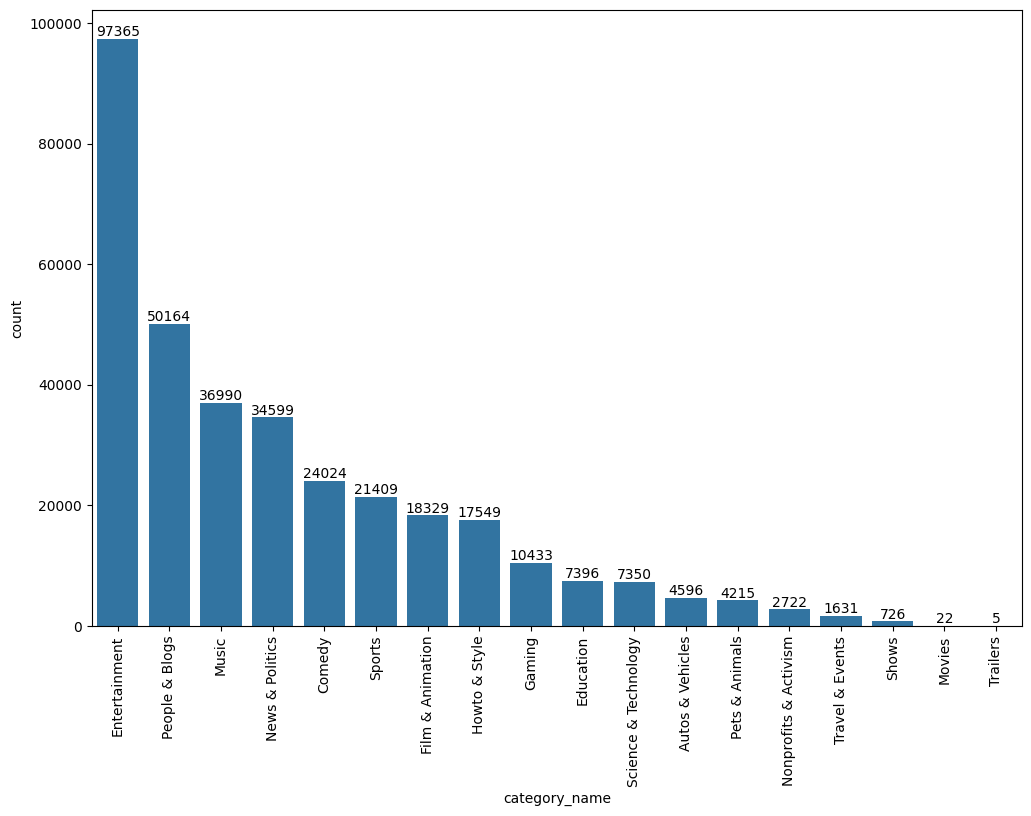

In [79]:
# Step 1: Calculate counts and sort them
category_counts = full_df['category_name'].value_counts().sort_values(ascending=False)

# Step 2: Create a new DataFrame with sorted categories
sorted_df = pd.DataFrame({'category_name': category_counts.index, 'count': category_counts.values})

plt.figure(figsize=(12,8))
# ax=sns.countplot(x='category_name', data=full_df)
ax = sns.barplot(x='category_name', y='count', data=sorted_df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation='vertical')
plt.show()

## Find whether the audience is engaged or not.

In [80]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,Howto & Style
1,3s1rvMFUweQ,17.14.11,Taylor Swift: â¦Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs â¦Ready f...,Entertainment
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,Sports
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,News & Politics


In [83]:
engagement=(full_df['likes']/full_df['views'])*100
engagement

0          0.770723
1          2.425989
2          4.589075
3          0.693421
4          0.305655
            ...    
375937    10.050160
375938     2.924207
375939     3.824554
375940     0.410516
375941     4.955203
Length: 339525, dtype: float64

In [84]:
full_df['like_rate']=(full_df['likes']/full_df['views'])*100
full_df['dislike_rate']=(full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate']=(full_df['comment_count']/full_df['views'])*100

In [85]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_count_rate
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,Howto & Style,0.770723,0.141837,0.131206
1,3s1rvMFUweQ,17.14.11,Taylor Swift: â¦Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs â¦Ready f...,Entertainment,2.425989,0.217723,0.261666
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,4.589075,0.253051,0.733639
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,Sports,0.693421,0.043114,0.132936
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,News & Politics,0.305655,0.020377,0.305655


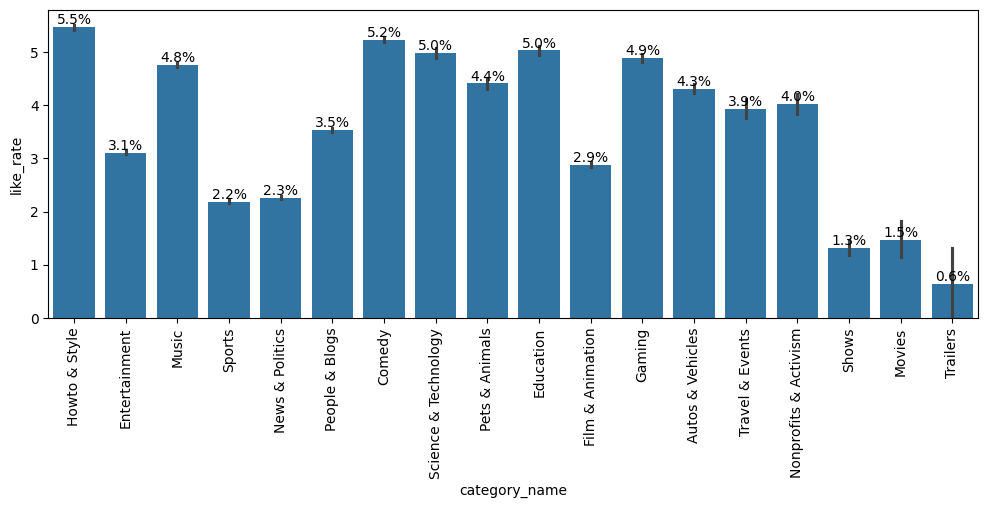

In [86]:
#plotting like rate against category name
plt.figure(figsize=(12,4))
ax=sns.barplot(x='category_name', y='like_rate', data= full_df, order=full_df['category_name'])
for bars in ax.containers:
    ax.bar_label(bars, labels=[f'{h.get_height():.1f}%' for h in bars], label_type='edge')
plt.xticks(rotation='vertical')
#plt.grid(True)
plt.show()

***We can see that How to Style, Comedy, Science & Technology and Education are the most liked categories by the users.***

## Analysing Relationship between Views and Likes

<Axes: xlabel='views', ylabel='likes'>

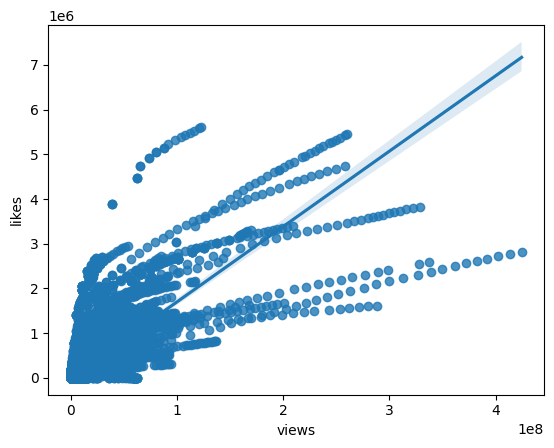

In [87]:
sns.regplot(x='views', y='likes', data=full_df)

In [88]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

In [89]:
full_df[['views', 'likes', 'dislikes']]

,views,likes,dislikes
0,7224515,55681,10247
1,1053632,25561,2294
2,17158579,787420,43420
3,27833,193,12
4,9815,30,2
...,...,...,...
375937,653114,65639,547
375938,121674,3558,58
375939,14067,538,6
375940,22898,94,11


**Find Correlation between 'views', 'likes', 'dislikes'**

In [90]:
full_df[['views', 'likes', 'dislikes']].corr()

,views,likes,dislikes
views,1.000000,0.779531,0.405428
likes,0.779531,1.000000,0.451809
dislikes,0.405428,0.451809,1.000000


<Axes: >

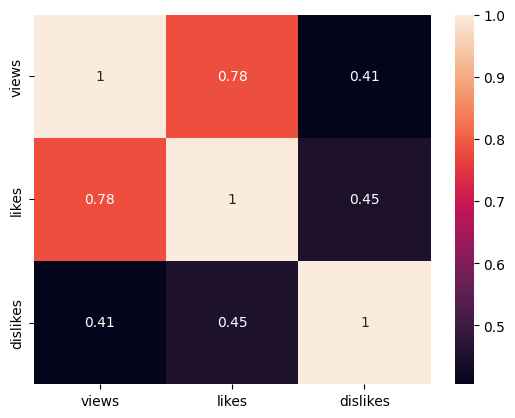

In [91]:
sns.heatmap(full_df[['views', 'likes', 'dislikes']].corr(), annot=True)

## Which Channel has the largest no. of trending videos?

In [92]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_count_rate
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,Howto & Style,0.770723,0.141837,0.131206
1,3s1rvMFUweQ,17.14.11,Taylor Swift: â¦Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs â¦Ready f...,Entertainment,2.425989,0.217723,0.261666
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,4.589075,0.253051,0.733639
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,Sports,0.693421,0.043114,0.132936
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,News & Politics,0.305655,0.020377,0.305655


In [93]:
#Count of Unique Channels
full_df['channel_title'].value_counts()

channel_title
The Late Show with Stephen Colbert                                           710
WWE                                                                          643
Late Night with Seth Meyers                                                  592
TheEllenShow                                                                 555
Jimmy Kimmel Live                                                            528
                                                                            ... 
MattOlChap                                                                     1
ÐÐ¾ÑÐºÐ¾Ð²ÑÐºÐ¸Ð¹ ÐÑÐ¸ÑÐ½ÑÐ¹ Ð¦ÐµÐ½ÑÑ Ð² ÐÐ¾ÑÐºÐ²Ð° - Ð¡Ð¸ÑÐ¸      1
äºä½ç¾                                                                      1
Natsumi Youta                                                                  1
BLA BLA                                                                        1
Name: count, Length: 37824, dtype: int64

In [94]:
#performing the same above operation by using Group by
cdf = full_df.groupby(['channel_title']).size().sort_values(ascending=False).reset_index()
cdf

,channel_title,0
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Kd Malts,1
37820,Zedan TV,1
37821,Kc Kelly - Rocketprenuer,1
37822,Kbaby,1


In [98]:
#Rename the third column
cdf=cdf.rename(columns={0:"total_videos"})

In [99]:
cdf

,channel_title,total_videos
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Kd Malts,1
37820,Zedan TV,1
37821,Kc Kelly - Rocketprenuer,1
37822,Kbaby,1


In [122]:
import plotly.express as px

px.bar(data_frame=cdf[0:20] , x='channel_title' , y='total_videos')

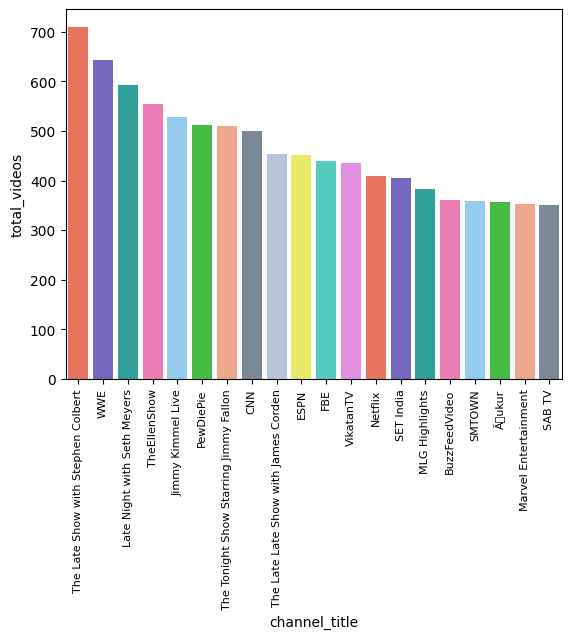

<Figure size 1800x500 with 0 Axes>

In [111]:
# Generate a list of colors (you can customize this list with more colors if needed)
colors = [
    '#FF6347', '#6A5ACD', '#20B2AA', '#FF69B4', '#87CEFA',
    '#32CD32', '#FFA07A', '#778899', '#B0C4DE', '#FFFF54',
    '#40E0D0', '#EE82EE', '#FF6347', '#6A5ACD', '#20B2AA',
    '#FF69B4', '#87CEFA', '#32CD32', '#FFA07A', '#778899'
]
sns.barplot(data=cdf[0:20], x='channel_title', y='total_videos', palette=colors)
plt.xticks(rotation='vertical',fontsize=8)
plt.figure(figsize=(18,5))
plt.show()